In [ ]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import pandas as pd

In [ ]:
# Вариант 5
n = 100
X = sps.norm(loc=5, scale=2).rvs(size=n)
Y = sps.norm(loc=5, scale=2).rvs(size=n)

### Выборочные характеристики $X$

In [ ]:
print('Выборочное среденее: %.3f' % X.mean())
print('Выборочная дисперсия: %.3f' % X.var())
print('Стандартное отклонение %.3f' % X.std())

Выборочное среденее: 5.062
Выборочная дисперсия: 4.412
Стандартное отклонение 2.100


### Выборочные характеристики $Y$

In [ ]:
print('Выборочное среденее: %.3f' % Y.mean())
print('Выборочная дисперсия: %.3f' % Y.var())
print('Стандартное отклонение %.3f' % Y.std())

Выборочное среденее: 5.115
Выборочная дисперсия: 3.849
Стандартное отклонение 1.962


### Ранговые коэффициенты корреляции

In [ ]:
coef, p = sps.pearsonr(X, Y)
print('Pirson correlation coefficient: %.3f' % coef)
print('Pirson p-value: %.3f' % p)

coef, p = sps.spearmanr(X, Y)
print('Spearmans correlation coefficient: %.3f' % coef)
print('Spearmans p-value: %.3f' % p)

coef, p = sps.kendalltau(X, Y)
print('Kendall correlation coefficient: %.3f' % coef)
print('Kendall p-value: %.3f' % p)

Pirson correlation coefficient: -0.050
Pirson p-value: 0.625
Spearmans correlation coefficient: -0.035
Spearmans p-value: 0.728
Kendall correlation coefficient: -0.023
Kendall p-value: 0.739


### Визуальное представление двумерной выборки

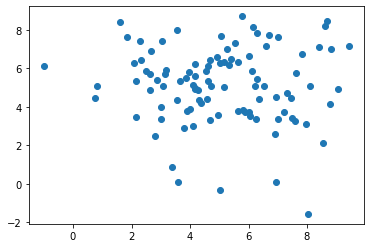

In [ ]:
plt.scatter(X, Y)

array([[ 0.,  0.,  1.,  2.,  0.],
       [ 0.,  1.,  3.,  9.,  5.],
       [ 2.,  1., 10., 19.,  2.],
       [ 1.,  0., 11.,  9.,  8.],
       [ 1.,  1.,  5.,  3.,  6.]])

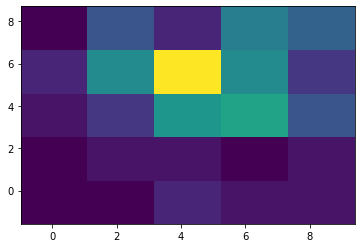

In [ ]:
plt.hist2d(X, Y, bins=5)
table = plt.hist2d(X, Y, bins=5)[0]
table

In [ ]:
n_row = []
n_col = [0, 0, 0, 0, 0]
for row in table:
    n_row.append(sum(row))
for i in range(len(table)):
    for j in range(len(table[i])):
        n_col[j] += table[i][j] 

#p = np.array(n_row)/n
#q = np.array(n_col)/n

teoretic_table = [[0]*len(n_col), [0]*len(n_col), [0]*len(n_col), [0]*len(n_col), [0]*len(n_col)]

for i in range(len(n_row)):
    for j in range(len(n_col)):
        teoretic_table[i][j] = n_row[i] * n_col[j] / n    
for i in teoretic_table:
    print(i)

    
z = 0
for i in range(len(n_row)):
    for j in range(len(n_col)):
        z += ((table[i][j] - teoretic_table[i][j])**2/teoretic_table[i][j])
        
print(z)

[0.12, 0.09, 0.9, 1.26, 0.63]
[0.72, 0.54, 5.4, 7.56, 3.78]
[1.36, 1.02, 10.2, 14.28, 7.14]
[1.16, 0.87, 8.7, 12.18, 6.09]
[0.64, 0.48, 4.8, 6.72, 3.36]
17.535232004679266


In [ ]:
(1 - sps.chi2(4 * 4).cdf(z))

0.3518055794280879

In [ ]:
sps.chi2(4 * 4).ppf(0.95)

26.29622760486423

In [ ]:
sps.chi2_contingency(table) #z поличились почти одинаковыми?

(17.53523200467927,
 0.3518055794280876,
 16,
 array([[ 0.12,  0.09,  0.9 ,  1.26,  0.63],
        [ 0.72,  0.54,  5.4 ,  7.56,  3.78],
        [ 1.36,  1.02, 10.2 , 14.28,  7.14],
        [ 1.16,  0.87,  8.7 , 12.18,  6.09],
        [ 0.64,  0.48,  4.8 ,  6.72,  3.36]]))

### Исследование корелляционной связи

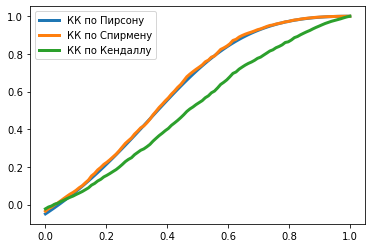

In [ ]:
points = np.linspace(0, 1, n)
y_r = []
y_p = []
y_t = []

for j in range(0, n):
  U = []
  lam = points[j] 
  for i in range(0, n):
    u = lam * X[i] + (1 - lam) * Y[i]
    U.append(u)
  y_r.append(sps.pearsonr(X, U)[0])
  y_p.append(sps.spearmanr(X, U)[0])
  y_t.append(sps.kendalltau(X, U)[0])

plt.plot(points, y_r, lw=3, label="КК по Пирсону")
plt.plot(points, y_p, lw=3, label = "КК по Спирмену")
plt.plot(points, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

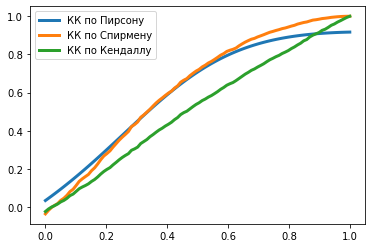

In [ ]:
y_r = []
y_p = []
y_t = []

for j in range(0, n):
  V = []
  lam = points[j] 
  for i in range(0, n):
    v = lam * X[i]**3 + (1 - lam) * Y[i]**3
    V.append(v)
  y_r.append(sps.pearsonr(X, V)[0])
  y_p.append(sps.spearmanr(X, V)[0])
  y_t.append(sps.kendalltau(X, V)[0])

plt.plot(points, y_r, lw=3, label="КК по Пирсону")
plt.plot(points, y_p, lw=3, label = "КК по Спирмену")
plt.plot(points, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

### Диаграмма рассеяния случайных величин X и V при $\lambda$ = 0:

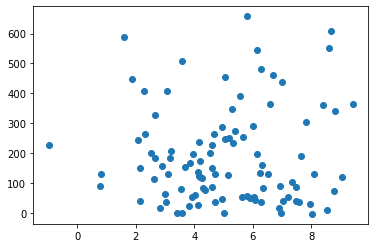

In [ ]:
lam = 0
V = []
for i in range(0, n):
    v = lam * X[i]**3 + (1 - lam) * Y[i]**3
    V.append(v)
plt.scatter(X, V)


### Диаграмма рассеяния случайных величин X и V при $\lambda$ = 1:

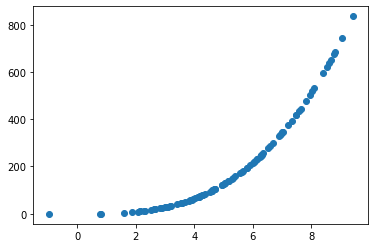

In [ ]:
lam = 1
V = []
for i in range(0, n):
    v = lam * X[i]**3 + (1 - lam) * Y[i]**3
    V.append(v)
plt.scatter(X, V)

### Диаграмма рассеяния рангов случайных величин X и V при $\lambda$ = 0:

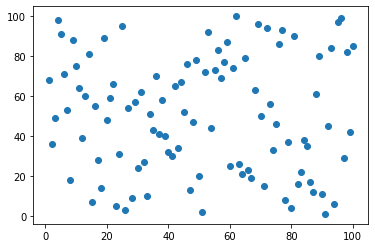

In [ ]:
lam = 0
V = []
for i in range(0, n):
    v = lam * X[i]**3 + (1 - lam) * Y[i]**3
    V.append(v)
V_rank = sps.rankdata(V)
X_rank = sps.rankdata(X)
plt.scatter(X_rank, V_rank)

### Диаграмма рассеяния рангов случайных величин X и V при $\lambda$ = 1:

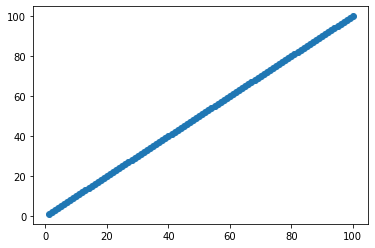

In [ ]:
lam = 1
V = []
for i in range(0, n):
    v = lam * X[i]**3 + (1 - lam) * Y[i]**3
    V.append(v)
V_rank = sps.rankdata(V)
X_rank = sps.rankdata(X)
plt.scatter(X_rank, V_rank)